# Week 9 - Beyond Text

This week, we "trascend" text to explore analysis of sound and visual content. Trillions of digital audio, image, and video files have been generated by cell phones and distributed sensors, preserved and shared through social medial, the web, private and government administrations. In this notebook, we read in and visualize audio and image files, process them to extract relevant features and measurement, then begin to explore how to analyze and extract information from them through the same approaches to supervised and unsupervised learning we have performed thoughout the quarter with text.

For this notebook we will use the following packages:

In [1]:
#All these packages need to be installed from pip
import scipy #For frequency analysis
import scipy.fftpack
import nltk #the Natural Language Toolkit
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import IPython #To show stuff

#Image handling install as Pillow
import PIL
import PIL.Image
import PIL.ImageOps

#install as scikit-image, this does the image manupulation
import skimage
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.future import graph
from skimage import data, segmentation, color, filters, io
from skimage.util.colormap import viridis
from skimage.color import rgb2gray

#these three do audio handling
import pydub #Requires ffmpeg to be installed
import speech_recognition #install as speechrecognition
import soundfile #Install as pysoundfile 

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning it may generate.
%matplotlib inline

import os
import os.path
import csv
import re
from math import sqrt

# Image Analysis


In [2]:
image_1 = PIL.Image.open('1.jpg')
imageArr1 = np.asarray(image_1)
#imageArr1.shape

image_2 = PIL.Image.open('2.jpg')
imageArr2 = np.asarray(image_2)

image_3 = PIL.Image.open('3.jpg')
imageArr3 = np.asarray(image_3)

image_4 = PIL.Image.open('4.jpg')
imageArr4 = np.asarray(image_4)

image_5 = PIL.Image.open('5.jpg')
imageArr5 = np.asarray(image_5)

image_6 = PIL.Image.open('6.jpg')
imageArr6 = np.asarray(image_6)

image_7 = PIL.Image.open('7.jpg')
imageArr7 = np.asarray(image_7)

image_8 = PIL.Image.open('8.jpg')
imageArr8 = np.asarray(image_8)

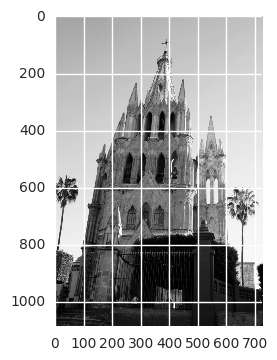

In [3]:
#green/blue/red images
plt.imshow(imageArr1[:,:,2], cmap='Greens') #The order is R G B, so 2 is the Green
#plt.imshow(imageArr[:,:,1], cmap='Blues')
#plt.imshow(imageArr[:,:,0], cmap='Reds')

#grey image
image_gray1 = PIL.ImageOps.invert(image_1.convert('L'))
image_grayArr1 = np.asarray(image_gray1)
image_grayArr1.shape
plt.imshow(image_gray1)




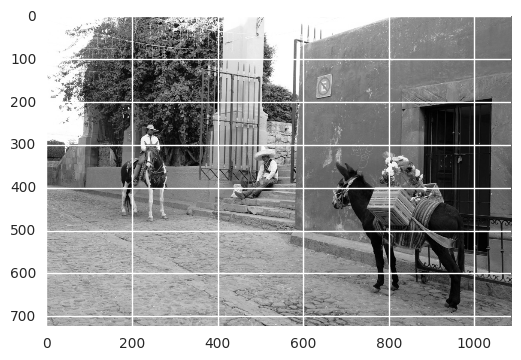

In [4]:
#green/blue/red images
plt.imshow(imageArr2[:,:,2], cmap='Greens') #The order is R G B, so 2 is the Green
#plt.imshow(imageArr[:,:,1], cmap='Blues')
#plt.imshow(imageArr[:,:,0], cmap='Reds')

#grey image
image_gray2 = PIL.ImageOps.invert(image_2.convert('L'))
image_grayArr2 = np.asarray(image_gray2)
image_grayArr2.shape
plt.imshow(image_gray2)

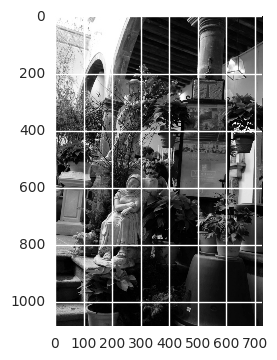

In [5]:
#green/blue/red images
plt.imshow(imageArr3[:,:,2], cmap='Greens') #The order is R G B, so 2 is the Green
#plt.imshow(imageArr[:,:,1], cmap='Blues')
#plt.imshow(imageArr[:,:,0], cmap='Reds')

#grey image
image_gray3 = PIL.ImageOps.invert(image_3.convert('L'))
image_grayArr3 = np.asarray(image_gray3)
image_grayArr3.shape
plt.imshow(image_gray3)

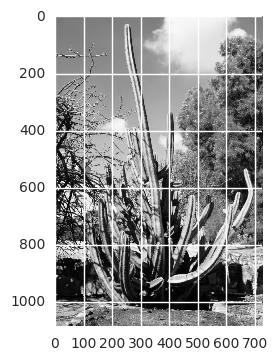

In [6]:
#green/blue/red images
plt.imshow(imageArr4[:,:,2], cmap='Greens') #The order is R G B, so 2 is the Green
#plt.imshow(imageArr[:,:,1], cmap='Blues')
#plt.imshow(imageArr[:,:,0], cmap='Reds')

#grey image
image_gray4 = PIL.ImageOps.invert(image_4.convert('L'))
image_grayArr4 = np.asarray(image_gray4)
image_grayArr4.shape
plt.imshow(image_gray4)

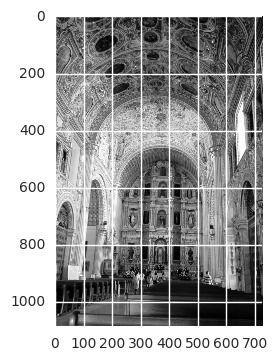

In [7]:
#green/blue/red images
plt.imshow(imageArr5[:,:,2], cmap='Greens') #The order is R G B, so 2 is the Green
#plt.imshow(imageArr[:,:,1], cmap='Blues')
#plt.imshow(imageArr[:,:,0], cmap='Reds')

#grey image
image_gray5 = PIL.ImageOps.invert(image_5.convert('L'))
image_grayArr5 = np.asarray(image_gray5)
image_grayArr5.shape
plt.imshow(image_gray5)

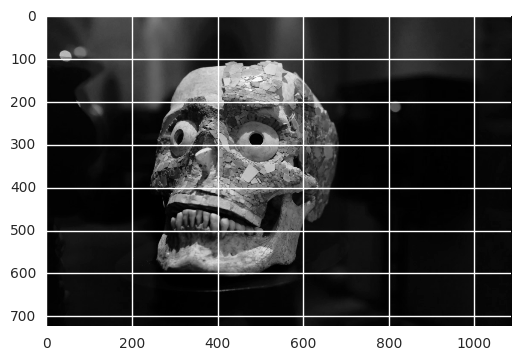

In [8]:
#green/blue/red images
plt.imshow(imageArr6[:,:,2], cmap='Greens') #The order is R G B, so 2 is the Green
#plt.imshow(imageArr[:,:,1], cmap='Blues')
#plt.imshow(imageArr[:,:,0], cmap='Reds')

#grey image
image_gray6 = PIL.ImageOps.invert(image_6.convert('L'))
image_grayArr6 = np.asarray(image_gray6)
image_grayArr6.shape
plt.imshow(image_gray6)

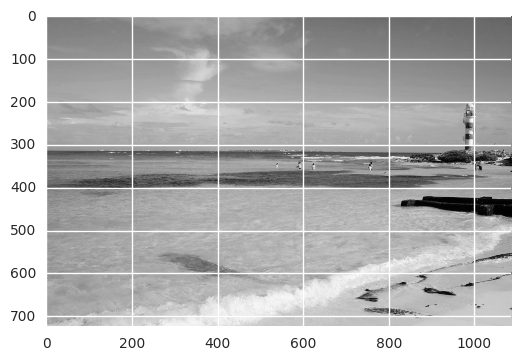

In [9]:
#green/blue/red images
plt.imshow(imageArr7[:,:,2], cmap='Greens') #The order is R G B, so 2 is the Green
#plt.imshow(imageArr[:,:,1], cmap='Blues')
#plt.imshow(imageArr[:,:,0], cmap='Reds')

#grey image
image_gray7 = PIL.ImageOps.invert(image_7.convert('L'))
image_grayArr7 = np.asarray(image_gray7)
image_grayArr7.shape
plt.imshow(image_gray7)

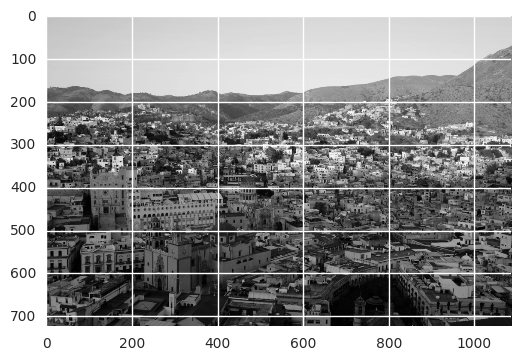

In [10]:
#green/blue/red images
plt.imshow(imageArr8[:,:,2], cmap='Greens') #The order is R G B, so 2 is the Green
#plt.imshow(imageArr[:,:,1], cmap='Blues')
#plt.imshow(imageArr[:,:,0], cmap='Reds')

#grey image
image_gray8 = PIL.ImageOps.invert(image_8.convert('L'))
image_grayArr8 = np.asarray(image_gray8)
image_grayArr8.shape
plt.imshow(image_gray8)

## Blob detection

The blob detector computes the Laplacian of Gaussian (LoG) images with successively increasing standard deviation and stacks them up in a cube. Blobs are local maximas within this cube. Detecting larger blobs is slower because of larger kernel sizes during convolution. Bright blobs on dark backgrounds are detected.

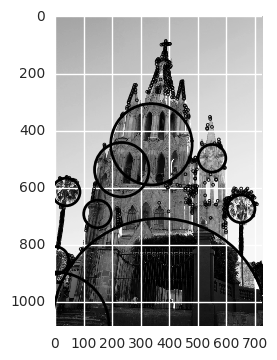

In [11]:
blobs_log = blob_log(image_grayArr1, max_sigma=300, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2) #Radi
fig, ax = plt.subplots()

plt.imshow(image_gray1, interpolation='nearest')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

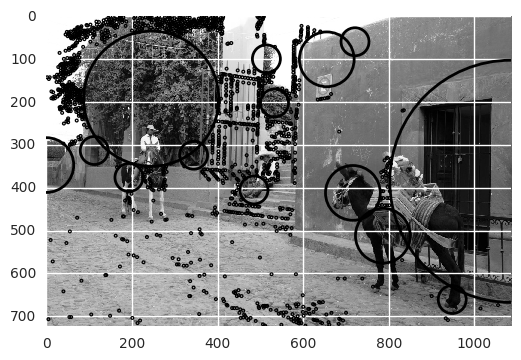

In [12]:
blobs_log = blob_log(image_grayArr2, max_sigma=200, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2) #Radi
fig, ax = plt.subplots()

plt.imshow(image_gray2, interpolation='nearest')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

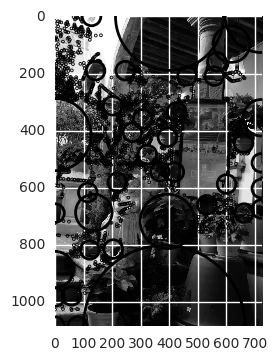

In [13]:
blobs_log = blob_log(image_grayArr3, max_sigma=200, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2) #Radi
fig, ax = plt.subplots()

plt.imshow(image_gray3, interpolation='nearest')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

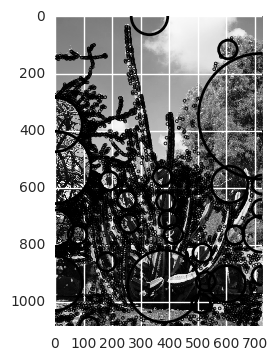

In [14]:
blobs_log = blob_log(image_grayArr4, max_sigma=200, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2) #Radi
fig, ax = plt.subplots()

plt.imshow(image_gray4, interpolation='nearest')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

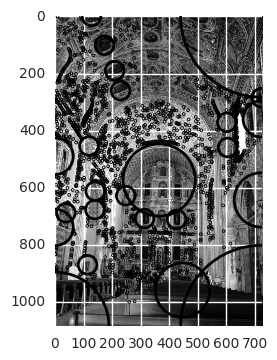

In [15]:
blobs_log = blob_log(image_grayArr5, max_sigma=200, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2) #Radi
fig, ax = plt.subplots()

plt.imshow(image_gray5, interpolation='nearest')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

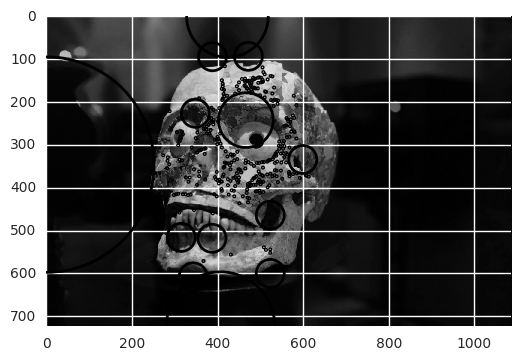

In [16]:
blobs_log = blob_log(image_grayArr6, max_sigma=200, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2) #Radi
fig, ax = plt.subplots()

plt.imshow(image_gray6, interpolation='nearest')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

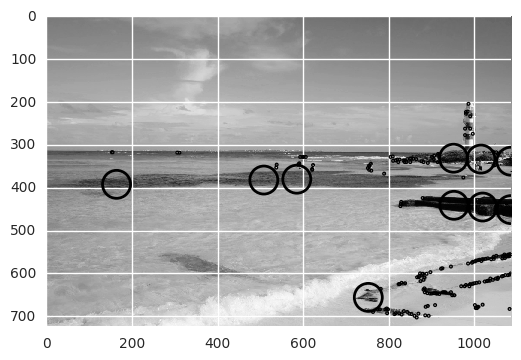

In [17]:
blobs_log = blob_log(image_grayArr7, max_sigma=200, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2) #Radi
fig, ax = plt.subplots()

plt.imshow(image_gray7, interpolation='nearest')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

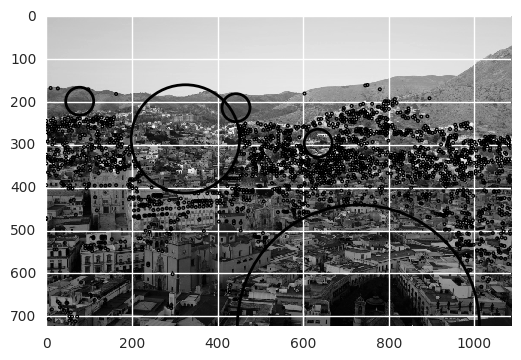

In [18]:
blobs_log = blob_log(image_grayArr8, max_sigma=200, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2) #Radi
fig, ax = plt.subplots()

plt.imshow(image_gray8, interpolation='nearest')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

Second, we look at Difference of Gaussian (DoG), a much faster approximation of the LoG approach in which an image is blurred with increasing standard deviations and the difference between two successively blurred images are stacked up in a cube. 

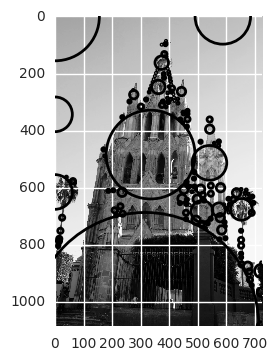

In [19]:
blobs_dog = blob_dog(image_grayArr1, max_sigma=300, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
fig, ax = plt.subplots()

plt.imshow(image_gray1, interpolation='nearest')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

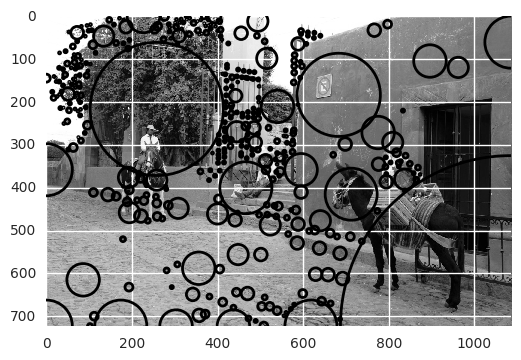

In [20]:
blobs_dog = blob_dog(image_grayArr2, max_sigma=300, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
fig, ax = plt.subplots()

plt.imshow(image_gray2, interpolation='nearest')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

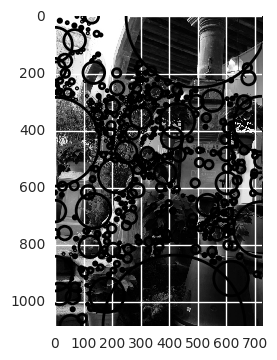

In [21]:
blobs_dog = blob_dog(image_grayArr3, max_sigma=200, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
fig, ax = plt.subplots()

plt.imshow(image_gray3, interpolation='nearest')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

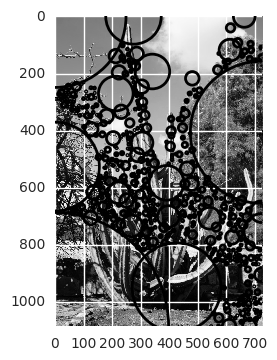

In [22]:
blobs_dog = blob_dog(image_grayArr4, max_sigma=300, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
fig, ax = plt.subplots()

plt.imshow(image_gray4, interpolation='nearest')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

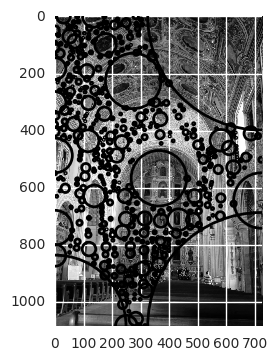

In [23]:
blobs_dog = blob_dog(image_grayArr5, max_sigma=300, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
fig, ax = plt.subplots()

plt.imshow(image_gray5, interpolation='nearest')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

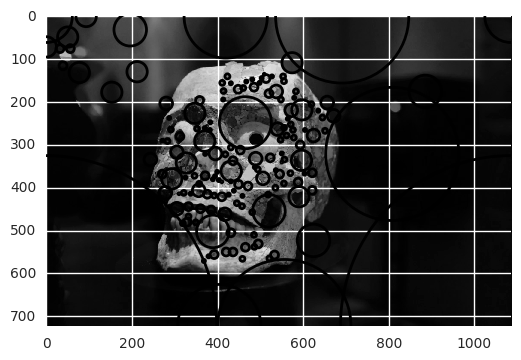

In [24]:
blobs_dog = blob_dog(image_grayArr6, max_sigma=300, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
fig, ax = plt.subplots()

plt.imshow(image_gray6, interpolation='nearest')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

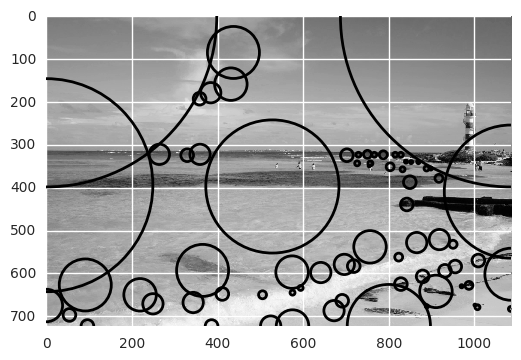

In [25]:
blobs_dog = blob_dog(image_grayArr7, max_sigma=300, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
fig, ax = plt.subplots()

plt.imshow(image_gray7, interpolation='nearest')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

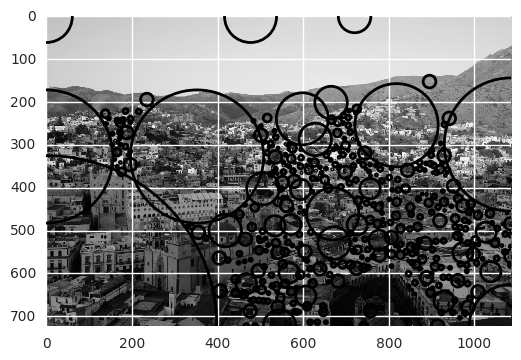

In [26]:
blobs_dog = blob_dog(image_grayArr8, max_sigma=300, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
fig, ax = plt.subplots()

plt.imshow(image_gray8, interpolation='nearest')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

Finally, we consider the Determinant of Hessian (DoH) approach. The Hessian matrix or Hessian is a square matrix of second-order partial derivatives $\frac{\partial^2 f}{\partial x_i \partial x_j}(x_1^{*}, \ldots, x_n^{*})$ and is calculated on square pixel patches of the image. The determinant is the scaling factor of each patch. This approach is fastest and detects blobs by finding maximas in this matrix (of the Determinant of the Hessian of the image). Detection speed is independent of the size of blobs as the implementation uses box filters, $\begin{bmatrix}1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1\end{bmatrix}$, instead of Gaussians for the convolution. As a result, small blobs (< 3 pixels) cannot be detected accurately. 

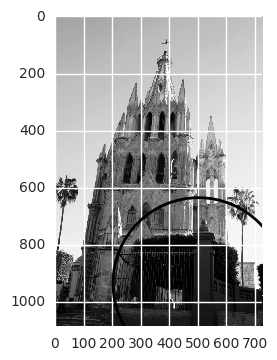

In [27]:
blobs_doh = blob_doh(image_gray1, max_sigma=300, threshold=.01)
fig, ax = plt.subplots()

plt.imshow(image_gray1, interpolation='nearest')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

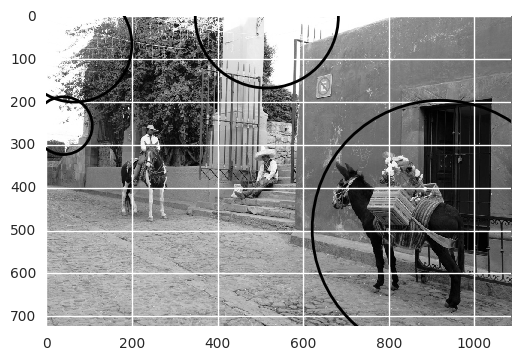

In [28]:
blobs_doh = blob_doh(image_gray2, max_sigma=300, threshold=.01)
fig, ax = plt.subplots()

plt.imshow(image_gray2, interpolation='nearest')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

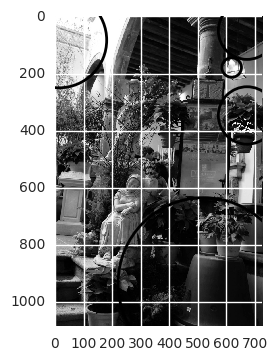

In [29]:
blobs_doh = blob_doh(image_gray3, max_sigma=300, threshold=.01)
fig, ax = plt.subplots()

plt.imshow(image_gray3, interpolation='nearest')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

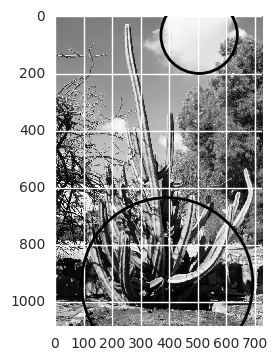

In [30]:
blobs_doh = blob_doh(image_gray4, max_sigma=300, threshold=.01)
fig, ax = plt.subplots()

plt.imshow(image_gray4, interpolation='nearest')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

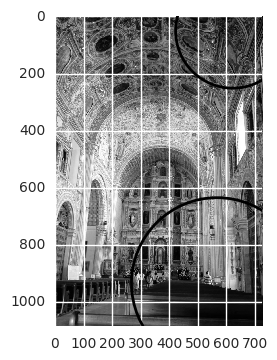

In [31]:
blobs_doh = blob_doh(image_gray5, max_sigma=300, threshold=.01)
fig, ax = plt.subplots()

plt.imshow(image_gray5, interpolation='nearest')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

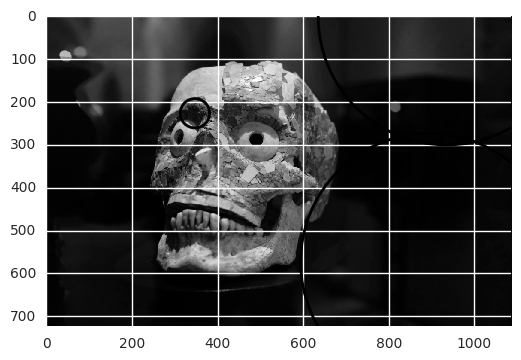

In [32]:
blobs_doh = blob_doh(image_gray6, max_sigma=300, threshold=.01)
fig, ax = plt.subplots()

plt.imshow(image_gray6, interpolation='nearest')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

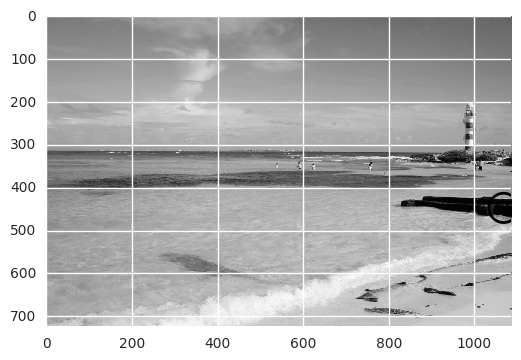

In [33]:
blobs_doh = blob_doh(image_gray7, max_sigma=300, threshold=.01)
fig, ax = plt.subplots()

plt.imshow(image_gray7, interpolation='nearest')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

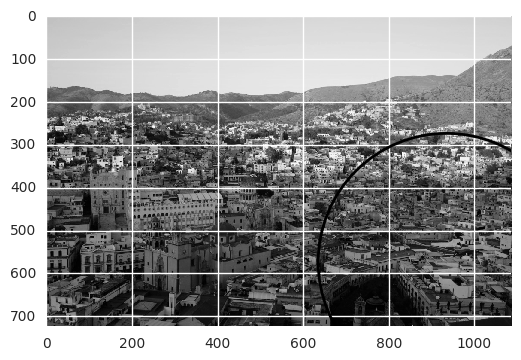

In [34]:
blobs_doh = blob_doh(image_gray8, max_sigma=300, threshold=.01)
fig, ax = plt.subplots()

plt.imshow(image_gray8, interpolation='nearest')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, linewidth=2, fill=False)
    ax.add_patch(c)

Humans possess an incredible ability to identify objects in an image. Segmentation is the process of dividing an image into meaningful regions. All pixels belonging to a region should receive a unique label in an ideal segmentation.

Region Adjacency Graphs (RAGs) are a common data structure for many segmentation algorithms. First, we define regions through the SLIC algorithm that assigns a unique label to each region or a localized cluster of pixels sharing some similar property (e.g., color or grayscale intensity). Then we'll consider each region a node in a graph, and construct a region boundary RAG, where the edge weight between two regions is the average value of the corresponding pixels in edge_map along their shared boundary. Then edges below a specified threshold are removed and a connected component is labeled as one region. 

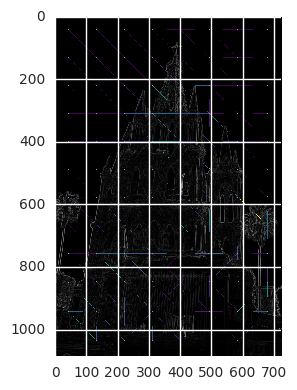

In [35]:
labels = segmentation.slic(image_gray1, compactness=30, n_segments=100)
edges = filters.sobel(image_grayArr1)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)

out = graph.draw_rag(labels, g, edges_rgb, node_color="#999999", colormap=viridis)

io.imshow(out)
io.show()

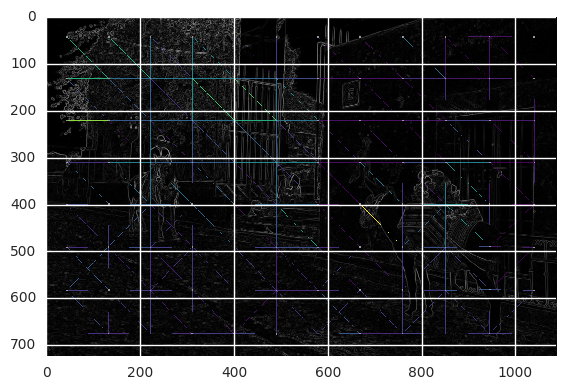

In [36]:
labels = segmentation.slic(image_gray2, compactness=30, n_segments=100)
edges = filters.sobel(image_grayArr2)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)

out = graph.draw_rag(labels, g, edges_rgb, node_color="#999999", colormap=viridis)

io.imshow(out)
io.show()

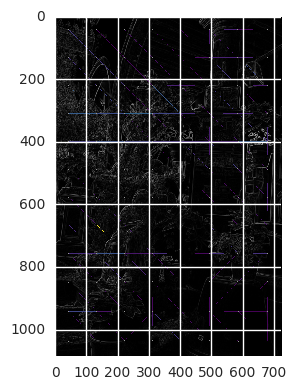

In [37]:
labels = segmentation.slic(image_gray3, compactness=30, n_segments=100)
edges = filters.sobel(image_grayArr3)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)

out = graph.draw_rag(labels, g, edges_rgb, node_color="#999999", colormap=viridis)

io.imshow(out)
io.show()

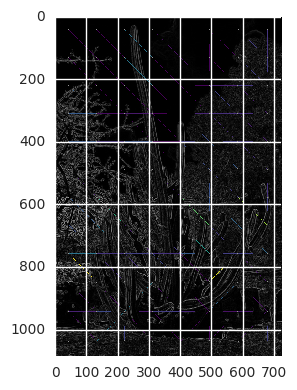

In [38]:
labels = segmentation.slic(image_gray4, compactness=30, n_segments=100)
edges = filters.sobel(image_grayArr4)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)

out = graph.draw_rag(labels, g, edges_rgb, node_color="#999999", colormap=viridis)

io.imshow(out)
io.show()

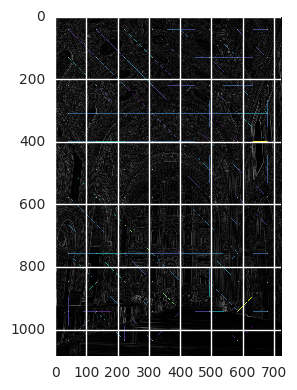

In [39]:
labels = segmentation.slic(image_gray5, compactness=30, n_segments=100)
edges = filters.sobel(image_grayArr5)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)

out = graph.draw_rag(labels, g, edges_rgb, node_color="#999999", colormap=viridis)

io.imshow(out)
io.show()

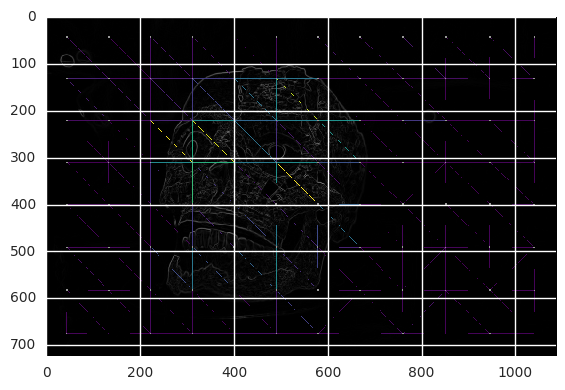

In [40]:
labels = segmentation.slic(image_gray6, compactness=30, n_segments=100)
edges = filters.sobel(image_grayArr6)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)

out = graph.draw_rag(labels, g, edges_rgb, node_color="#999999", colormap=viridis)

io.imshow(out)
io.show()

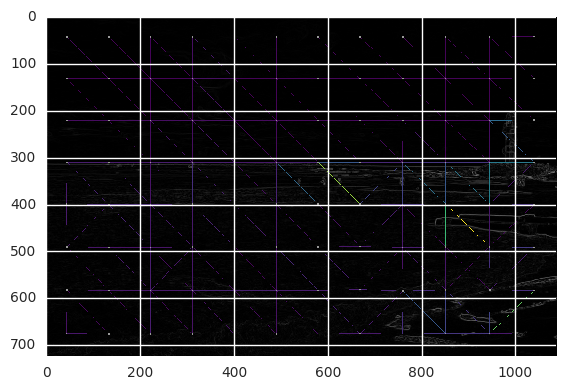

In [41]:
labels = segmentation.slic(image_gray7, compactness=30, n_segments=100)
edges = filters.sobel(image_grayArr7)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)

out = graph.draw_rag(labels, g, edges_rgb, node_color="#999999", colormap=viridis)

io.imshow(out)
io.show()

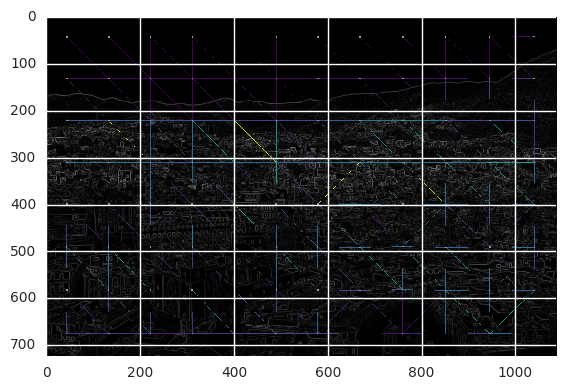

In [42]:
labels = segmentation.slic(image_gray8, compactness=30, n_segments=100)
edges = filters.sobel(image_grayArr8)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)

out = graph.draw_rag(labels, g, edges_rgb, node_color="#999999", colormap=viridis)

io.imshow(out)
io.show()

# Object Detection & Scene Classification

Modern image and video analysis is typically performed using deep learning implemented as layers of convolutional neural nets to classify scenes and to detect and label objects. To learn more about deep learning and convolutional neural networks, spend some time with Andrew Ng's excellent [tutorial](http://ufldl.stanford.edu/tutorial/). Because such algorithms require substantial computing power, none of the high-quality classifiers or detectors currently available are implemented in python, although many can be called via api. The most popular open source image object detector is UC Berkeley's [*caffe*](http://caffe.berkeleyvision.org) library of trained and trainable neural nets written in C++. (Check out the [python api](https://github.com/BVLC/caffe/blob/master/python/caffe/pycaffe.py)). Scene classifiers can be built on top of caffe, such as MIT's [Places](http://places.csail.mit.edu).

## <span style="color:red">*Your Turn*</span>

<span style="color:red">Construct cells immediately below this that report the results from experiments in which you place each of images taken or retrieved for the last exercise through the online demos for [caffe](http://demo.caffe.berkeleyvision.org) and [places](http://places.csail.mit.edu/demo.html). Paste the image and the output for both object detector and scene classifier below, beside one another. Calculate precision and recall for caffe's ability to detect objects of interest across your images. What do you think about Places' scene categories and their assignments to your images? What would be improved labels for your images? Could you use image classification to enhance your research project and, if so, how?

In [45]:
#Caffe image 1 
IPython.display.Image('c_1_1.jpg')

In [46]:
IPython.display.Image('c_1_2.jpg')